# Run the ./app with different parameters

In [1]:
import os
dims = [100000*2**i for i in range(11)] + [160000000]
# dims = [102400000, 160000000]
ks = [0.001, 0.01, 0.1, 1000, 10000, 100000]

# Plot figures

In [2]:
import matplotlib.pyplot as plt
import numpy as np
nth_enclaves = {}
nth_rams = {}
heap_encalves =  {}
std_nth_enclaves = {}
std_nth_rams = {}
std_heap_encalves = {}    
labels = ["Qselect Enclave", "Min-Heap Enclave", "Qselect RAM"]
colors = ["C0", "C1", "C2"]

In [3]:
for dim in dims:
    nth_enclaves[dim] = {}
    nth_rams[dim] =  {}
    heap_encalves[dim] =  {}
    std_nth_enclaves[dim] = {}
    std_nth_rams[dim] = {}
    std_heap_encalves[dim] = {}
    for k in ks:
        filename = "output/"+str(dim)+"_"+str(k)+".out"
        f = open(filename, "r")
        lines = f.readlines()
        if dim>100000000 and abs(k-0.1)<1e-3:
            times = 50
        elif dim==102400000 and abs(k-0.01)<1e-3:
            times = 25
        else:
            times = 100
        nth_enclave = []
        nth_ram = []
        heap_enclave = []
        for t in range(times):
            idx = t*15
            l = lines[idx+4]
            nth_enclave.append(float(l[l.find(":")+1:-3])/1000)
            l = lines[idx+8]
            heap_enclave.append(float(l[l.find(":")+1:-3])/1000)
            l = lines[idx+11]
            nth_ram.append(float(l[l.find(":")+1:-3])/1000)
        nth_enclaves[dim][k] = np.mean(nth_enclave)
        nth_rams[dim][k] =  np.mean(nth_ram)
        heap_encalves[dim][k] = np.mean(heap_enclave)
        std_nth_enclaves[dim][k] = np.std(nth_enclave)
        std_nth_rams[dim][k] =  np.std(nth_ram)
        std_heap_encalves[dim][k] = np.std(heap_enclave)

## x-axis: dims

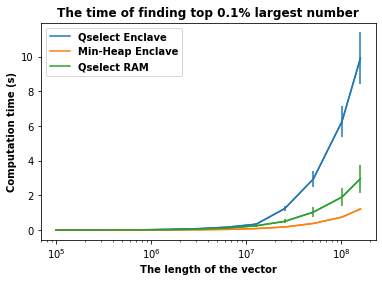

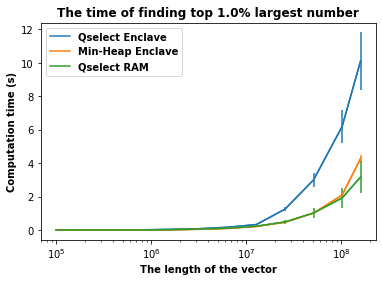

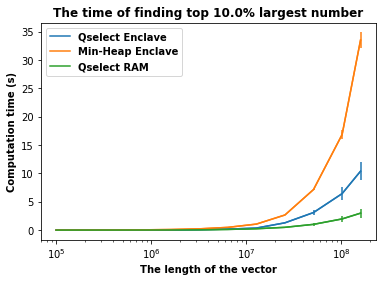

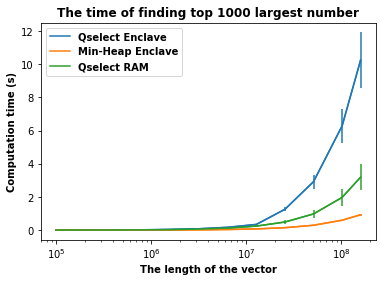

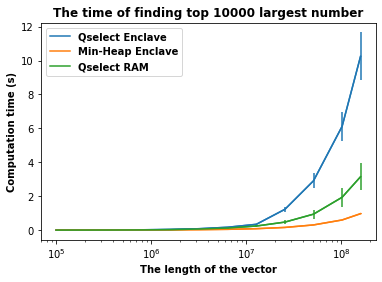

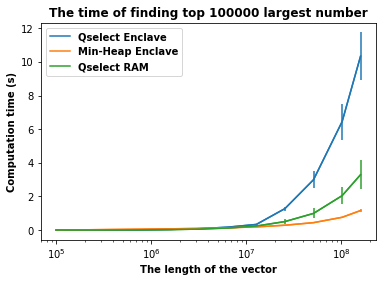

In [4]:
for k in ks:
    y = [[] for i in range(3)]
    e = [[] for i in range(3)]
    for dim in dims:
        y[0].append(nth_enclaves[dim][k])
        y[1].append(heap_encalves[dim][k])
        y[2].append(nth_rams[dim][k])
        e[0].append(std_nth_enclaves[dim][k])
        e[1].append(std_heap_encalves[dim][k])
        e[2].append(std_nth_rams[dim][k])
    plt.figure()
    for i in range(3):
        plt.plot(dims, y[i], label = labels[i], color=colors[i])
        plt.errorbar(dims, y[i], e[i], color=colors[i])
    plt.xlabel('The length of the vector', fontweight='bold')
    plt.xscale('log')
    # Set the y axis label of the current axis.
    plt.ylabel('Computation time (s)', fontweight='bold')
    if k<1:
        plt.title('The time of finding top '+str(k*100)+"% largest number", fontweight='bold')
    else:
        plt.title('The time of finding top '+str(k)+" largest number", fontweight='bold')
    plt.legend(prop={'weight':'bold'})
    plt.savefig("imgs/dim/k_"+str(k)+".png", dpi=300)

## x-axis: ks

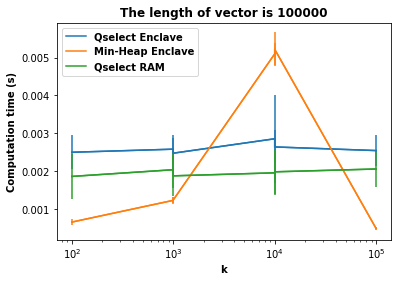

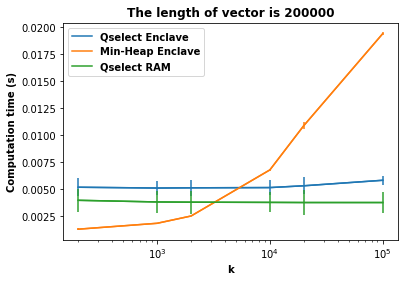

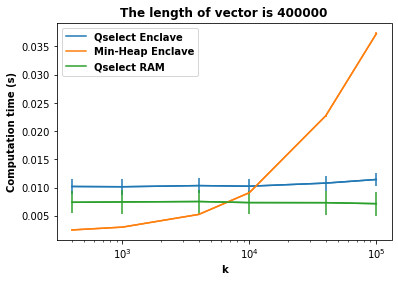

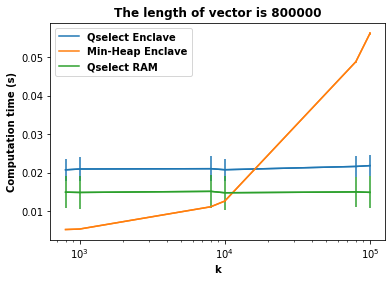

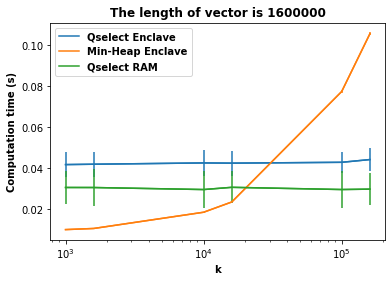

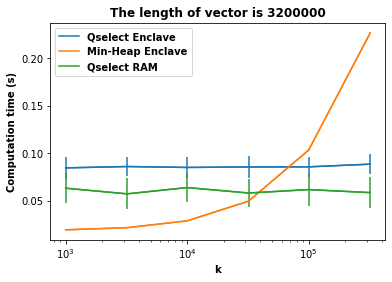

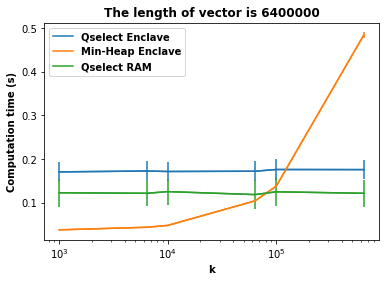

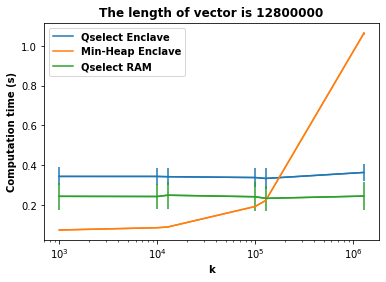

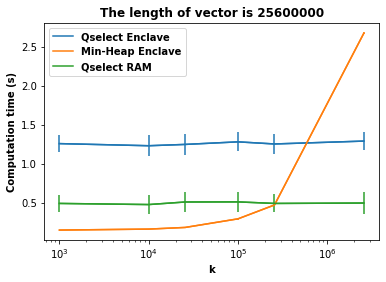

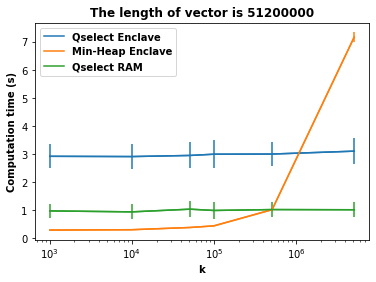

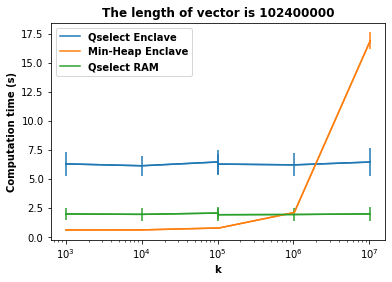

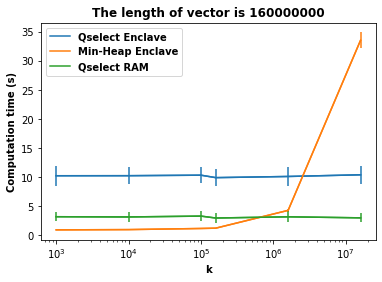

In [5]:
for dim in dims:
    ks_ = []
    for k in ks:
        if k<1:
            ks_.append(k*dim)
        else:
            ks_.append(k)
    idx = sorted(range(len(ks_)), key=lambda k: ks_[k])
    ks_ = [ks_[i] for i in idx]
    x = [ks_ for i in range(3)]
    y = [[] for i in range(3)]
    e = [[] for i in range(3)]
    for k in ks:
        y[0].append(nth_enclaves[dim][k])
        y[1].append(heap_encalves[dim][k])
        y[2].append(nth_rams[dim][k])
        e[0].append(std_nth_enclaves[dim][k])
        e[1].append(std_heap_encalves[dim][k])
        e[2].append(std_nth_rams[dim][k])
    plt.figure()
    for i in range(3):
        y[i] = [y[i][j] for j in idx]
        e[i] = [e[i][j] for j in idx]
        plt.plot(ks_, y[i], label = labels[i], color=colors[i])
        plt.errorbar(x[i], y[i], e[i], color=colors[i])
    plt.xlabel('k', fontweight='bold')
    plt.xscale('log')
    # Set the y axis label of the current axis.
    plt.ylabel('Computation time (s)', fontweight='bold')
    plt.title("The length of vector is "+str(dim), fontweight='bold')
    plt.legend(prop={'weight':'bold'})
    plt.savefig("imgs/k/dim_"+str(dim)+".png", dpi=300)